# 1. 개요

    - 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
    - 구글의 엔지니어가 만듬 (2015/03)
    - 내부적으로는 텐서프로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원
    
    
    책 추천 - 케라스 창시자에게 배우는 딥러닝 
    
    
# 2. 주요 특징

    - 모듈화
    - 최소주의
    - 쉬운 확장성
    - 파이썬 기반

# Keras 설치

    pip install keras

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻


import keras
from keras.models import Sequential  # 모델 생성용
from keras.models import load_model  # 저장한 모델 불러오기
from keras.layers.core import Dense  # shape 조정
from keras.optimizers import RMSprop #
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

    Using TensorFlow backend. 
        = backend로는 텐서플로우를 이용한다는 것.
        
    
    사용자 -> keras 설치됐으면 keras 폴더가 생성된다. -> 안에 json파일은 설정파일
    
    
    {
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
    }
    
    여기서 보면 backend의 기본값이 뭘로 되있는지 알 수 있다.

# 실습1. 혈핵형 예측 

    x09.txt  데이터 이용
    32번째 부터 실제 데이터이고 그 전까지는 설명

    선형회귀를 위한 데이터 
    
    - 07. 텐서플로우-선형, 로지스틱 참고
    
        tf의 placeholder를 사용했다.
        
        그래프를 생성하고 run으로 실행 시켰다는 것을 기억해라
        
        그런데 이렇게 간단한것도 tf로 하면 되게 불편하지 않나? 라는 생각
        
        데이터가 복잡하다면 유리하겠지만 간단한 것을 구현하기엔 어렵다. 
        
        그래서 케라스가 등장 
        
    - tf 이전 엔진
        theano
        
            keras에서는 tensorflow와 theano 둘 다 실행 가능 


#### 선형 회귀 분석

In [4]:
# 데이터 불러오기

np.random.seed(7)
data = np.genfromtxt("data/x09.txt", skip_header = 36)  # 불러오는 함수
# skip_header : 몇번째까지 건너뛸건지 
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [8]:
# 다중 회귀 모델이여야 한다. x값이 여러개이기 때문
# 텐서플로우에서는 되게 복잡하다. (그래프 작업)
X = np.array(data[:, 2: 4], dtype=np.float32)
y = np.array(data[:, 4], dtype=np.float32)
X
y

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.], dtype=float32)

In [13]:
model = Sequential()
model.add(Dense(1, input_shape=(2, ))) # 레이어 추가 Dense() 입력과 출력을 묶는 함수

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


    텐서플로우에서 가설공식을 세워서 찾아야 했지만.
    
    keras에서는 우리가 가설 세울 필요가없다.
    
    from keras.models import Sequential 을 사용하면 많은 가설공식을 사용할 수 있다.
    from keras.layers.core import Dense
    
    텐서플로우의
    
        X1 = tf.placeholder(tf.float32, shape=[None])
        X2 = tf.placeholder(tf.float32, shape=[None])
        X3 = tf.placeholder(tf.float32, shape=[None])

        y = tf.placeholder(tf.float32, shape=[None])


         가중치
        W1 = tf.Variable(tf.random_normal([1]))
        W2 = tf.Variable(tf.random_normal([1]))
        W3 = tf.Variable(tf.random_normal([1]))
        b = tf.Variable(tf.random_normal([1]))


         가설
        hypothesis = W1*X1 + W2*X2 + W3*X3 + b

    이 작업을 한줄로 끝낸 것이다.
    
    또 독립변수가 여러개라면 매트릭스로 처리한다. 그래서 shape을 정해줬었는데 
    이 정보만 넘겨주면 된다. 
    
    
    model = Sequential()
    model.add(Dense(1, input_shape=(2, ))) # 레이어 추가 
        Dense() 입력과 출력을 묶는 함수
            여기서는 출력이 1개이고 입력이  독립변수 2개 전체 데이터 갯수 26 개
            Dense(1, input_shape=(2, 26)) 이렇게 써야하지만
            생략해서 Dense(1, input_shape=(2, )) 이렇게 쓴다. 

    
            

In [18]:
# 비용처리 계산을 한번에 끝내는 함수 compile()
model.compile(loss="mse", optimizer= RMSprop(lr=0.01))

    비용은 알고리즘 마다 다른데 어떻게?
    
    loss옵션으로 어떤건지만 알려주면 된다. 
    
    평균제곱 오차에 대한 옵션이 다 있다.
    
    loss="mse" : Mean Square Error?
    
    
    선형회귀에서 많이 쓰는 알고리즘
    from keras.optimizers import RMSprop
    optiminzer= RMSprop(lr=0.01)  : 뭐 다른 알고리즘을 써도 된다. lr은 learning_rate

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


    텐서플로우에서는 여기까지가 그래프 생성이었다.
    그 후 run을 통해 실행시켰는데
    
    keras에서는 어떻게 바뀌었는지 봐보자

In [21]:
# 훈련 실행
hist = model.fit(X, y, epochs=1000)  #입력, 출력, 반복횟수(epoch)


Epoch 1/1000
25/25 [==============================] - 0s 13ms/step - loss: 69871.0938
Epoch 2/1000
25/25 [==============================] - 0s 40us/step - loss: 68076.3594
Epoch 3/1000
25/25 [==============================] - 0s 40us/step - loss: 66797.8984
Epoch 4/1000
25/25 [==============================] - 0s 0us/step - loss: 65741.3125
Epoch 5/1000
25/25 [==============================] - 0s 40us/step - loss: 64813.5156
Epoch 6/1000
25/25 [==============================] - 0s 40us/step - loss: 63971.3984
Epoch 7/1000
25/25 [==============================] - 0s 40us/step - loss: 63191.0039
Epoch 8/1000
25/25 [==============================] - 0s 40us/step - loss: 62457.4297
Epoch 9/1000
25/25 [==============================] - 0s 40us/step - loss: 61760.7148
Epoch 10/1000
25/25 [==============================] - 0s 40us/step - loss: 61093.8164
Epoch 11/1000
25/25 [==============================] - 0s 40us/step - loss: 60451.5938
Epoch 12/1000
25/25 [==============================]

Epoch 94/1000
25/25 [==============================] - 0s 40us/step - loss: 25587.4121
Epoch 95/1000
25/25 [==============================] - 0s 40us/step - loss: 25276.5391
Epoch 96/1000
25/25 [==============================] - 0s 0us/step - loss: 24967.9609
Epoch 97/1000
25/25 [==============================] - 0s 40us/step - loss: 24661.6523
Epoch 98/1000
25/25 [==============================] - 0s 40us/step - loss: 24357.6309
Epoch 99/1000
25/25 [==============================] - 0s 0us/step - loss: 24055.8848
Epoch 100/1000
25/25 [==============================] - 0s 0us/step - loss: 23756.4199
Epoch 101/1000
25/25 [==============================] - 0s 40us/step - loss: 23459.2305
Epoch 102/1000
25/25 [==============================] - 0s 40us/step - loss: 23164.3145
Epoch 103/1000
25/25 [==============================] - 0s 40us/step - loss: 22871.6719
Epoch 104/1000
25/25 [==============================] - 0s 40us/step - loss: 22581.3027
Epoch 105/1000
25/25 [===================

Epoch 188/1000
25/25 [==============================] - 0s 40us/step - loss: 6121.5044
Epoch 189/1000
25/25 [==============================] - 0s 0us/step - loss: 6016.7368
Epoch 190/1000
25/25 [==============================] - 0s 0us/step - loss: 5913.9951
Epoch 191/1000
25/25 [==============================] - 0s 0us/step - loss: 5813.2754
Epoch 192/1000
25/25 [==============================] - 0s 0us/step - loss: 5714.5708
Epoch 193/1000
25/25 [==============================] - 0s 37us/step - loss: 5617.8730
Epoch 194/1000
25/25 [==============================] - 0s 40us/step - loss: 5523.1738
Epoch 195/1000
25/25 [==============================] - 0s 40us/step - loss: 5430.4717
Epoch 196/1000
25/25 [==============================] - 0s 0us/step - loss: 5339.7515
Epoch 197/1000
25/25 [==============================] - 0s 0us/step - loss: 5251.0107
Epoch 198/1000
25/25 [==============================] - 0s 38us/step - loss: 5164.2373
Epoch 199/1000
25/25 [===========================

Epoch 283/1000
25/25 [==============================] - 0s 40us/step - loss: 2815.1348
Epoch 284/1000
25/25 [==============================] - 0s 0us/step - loss: 2808.1157
Epoch 285/1000
25/25 [==============================] - 0s 0us/step - loss: 2801.0613
Epoch 286/1000
25/25 [==============================] - 0s 0us/step - loss: 2793.9768
Epoch 287/1000
25/25 [==============================] - 0s 0us/step - loss: 2786.8704
Epoch 288/1000
25/25 [==============================] - 0s 40us/step - loss: 2779.7437
Epoch 289/1000
25/25 [==============================] - 0s 40us/step - loss: 2772.6050
Epoch 290/1000
25/25 [==============================] - 0s 40us/step - loss: 2765.4568
Epoch 291/1000
25/25 [==============================] - 0s 40us/step - loss: 2758.3049
Epoch 292/1000
25/25 [==============================] - 0s 40us/step - loss: 2751.1526
Epoch 293/1000
25/25 [==============================] - 0s 0us/step - loss: 2744.0034
Epoch 294/1000
25/25 [==========================

Epoch 378/1000
25/25 [==============================] - 0s 40us/step - loss: 2242.6331
Epoch 379/1000
25/25 [==============================] - 0s 40us/step - loss: 2237.9282
Epoch 380/1000
25/25 [==============================] - 0s 40us/step - loss: 2233.3674
Epoch 381/1000
25/25 [==============================] - 0s 0us/step - loss: 2228.8267
Epoch 382/1000
25/25 [==============================] - 0s 0us/step - loss: 2224.3601
Epoch 383/1000
25/25 [==============================] - 0s 0us/step - loss: 2219.9138
Epoch 384/1000
25/25 [==============================] - 0s 0us/step - loss: 2215.5073
Epoch 385/1000
25/25 [==============================] - 0s 40us/step - loss: 2211.1191
Epoch 386/1000
25/25 [==============================] - 0s 40us/step - loss: 2206.7639
Epoch 387/1000
25/25 [==============================] - 0s 40us/step - loss: 2202.4290
Epoch 388/1000
25/25 [==============================] - 0s 40us/step - loss: 2198.1277
Epoch 389/1000
25/25 [=========================

Epoch 473/1000
25/25 [==============================] - 0s 0us/step - loss: 1937.5300
Epoch 474/1000
25/25 [==============================] - 0s 40us/step - loss: 1935.6770
Epoch 475/1000
25/25 [==============================] - 0s 0us/step - loss: 1933.8215
Epoch 476/1000
25/25 [==============================] - 0s 40us/step - loss: 1932.0228
Epoch 477/1000
25/25 [==============================] - 0s 40us/step - loss: 1930.2206
Epoch 478/1000
25/25 [==============================] - 0s 39us/step - loss: 1928.4747
Epoch 479/1000
25/25 [==============================] - 0s 0us/step - loss: 1926.7253
Epoch 480/1000
25/25 [==============================] - 0s 0us/step - loss: 1925.0316
Epoch 481/1000
25/25 [==============================] - 0s 0us/step - loss: 1923.3347
Epoch 482/1000
25/25 [==============================] - 0s 0us/step - loss: 1921.6936
Epoch 483/1000
25/25 [==============================] - 0s 40us/step - loss: 1920.0491
Epoch 484/1000
25/25 [===========================

Epoch 568/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.9111
Epoch 569/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.8341
Epoch 570/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.7635
Epoch 571/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.6920
Epoch 572/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.6268
Epoch 573/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.5598
Epoch 574/1000
25/25 [==============================] - 0s 39us/step - loss: 1862.4978
Epoch 575/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.4352
Epoch 576/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.3772
Epoch 577/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.3175
Epoch 578/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.2627
Epoch 579/1000
25/25 [===========================

Epoch 663/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.7177
Epoch 664/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6796
Epoch 665/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6390
Epoch 666/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6010
Epoch 667/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.5604
Epoch 668/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.5225
Epoch 669/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4823
Epoch 670/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4446
Epoch 671/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4042
Epoch 672/1000
25/25 [==============================] - 0s 0us/step - loss: 1858.3665
Epoch 673/1000
25/25 [==============================] - 0s 0us/step - loss: 1858.3260
Epoch 674/1000
25/25 [=======================

Epoch 758/1000
25/25 [==============================] - 0s 40us/step - loss: 1855.0245
Epoch 759/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9849
Epoch 760/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9470
Epoch 761/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9072
Epoch 762/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.8700
Epoch 763/1000
25/25 [==============================] - 0s 0us/step - loss: 1854.8304
Epoch 764/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7930
Epoch 765/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7533
Epoch 766/1000
25/25 [==============================] - 0s 0us/step - loss: 1854.7159
Epoch 767/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.6763
Epoch 768/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.6388
Epoch 769/1000
25/25 [=======================

Epoch 853/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.3806
Epoch 854/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.3434
Epoch 855/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.3051
Epoch 856/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.2678
Epoch 857/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.2286
Epoch 858/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.1915
Epoch 859/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.1525
Epoch 860/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.1154
Epoch 861/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.0765
Epoch 862/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.0389
Epoch 863/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.0000
Epoch 864/1000
25/25 [============================

Epoch 948/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7898
Epoch 949/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7516
Epoch 950/1000
25/25 [==============================] - 0s 39us/step - loss: 1847.7148
Epoch 951/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.6758
Epoch 952/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.6395
Epoch 953/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.6014
Epoch 954/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.5648
Epoch 955/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.5261
Epoch 956/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.4901
Epoch 957/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.4513
Epoch 958/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.4148
Epoch 959/1000
25/25 [=========================

    비용이 줄어듬을 확인할 수 있다. 

dict_keys(['loss'])


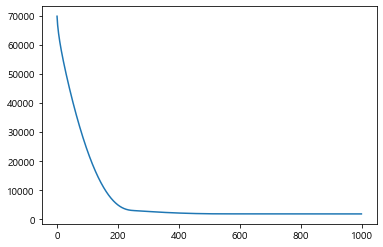

In [24]:
print(hist.history.keys())
# print(hist.history["loss"])
plt.plot(hist.history["loss"])

    최소비용의 값을 loss가 가지고 있음
    그래서 loss를 그래프로 그려서 확인해보자
    
    그래프를 통하여 감소됨을 확인되었다.

### 예측

    체중이 100이고 나이가 40일때 혈당은?

In [26]:
# predict 함수
model.predict(np.array([100, 40]).reshape(1, 2))  
# 차원을 맞춰야한다. 행과열의 갯수

array([[350.51718]], dtype=float32)

    이 사람의 혈당은 350이다. 

In [27]:
# 가중치, 절편 회귀선 확인
w, b = model.get_weights()

print(w, b)

[[1.1939979]
 [5.5435057]] [9.377161]


    가중치(2,1)와 절편(1,1)값이다. 

# 실습2. 주택가격 예측(회귀분석)

    boston 집값 데이터   
    from keras.datasets  ->   keras 관련 데이터셋들

In [51]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()  #훈련용, 테스트용을 튜플로 받아올수있다.


In [52]:
print(train_data.shape, test_data.shape)
print(train_targets[0:10]) 

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [53]:
# 전처리(정규화)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

    입력값은 404개
    결과값은 1개이다. 

In [54]:
# Sequential 준비 
model = Sequential()
model.add(Dense(64, input_shape=(train_data.shape[1], ), activation = "relu"))
model.add(Dense(64, activation="relu")) 
model.add(Dense(1))

    입력갯수 출력갯수를 정해준다
    
    layer를 두개로 할 것이기 때문에 출력에 주의 한다.
    
    
    layer1
        model.add(Dense(64, input_shape=(train_data.shape[1], ), activation = "relu")) 
            model.add(64개출력, 독립변수 13개 전체 데이터 갯수 404개
            train_data.shape[1]라고 하는게 좀 더 융통성이 생긴다. 

        activation : 알고리즘 선택 옵션 (sigmoid, ReLU 같은 알고리즘)
    
    
    layer2
        model.add(Dense(64, activation="relu")) 
            얘는 자동으로 layer1의 출력을 입력값으로 받기 때문에 안써도 된다.
            activation은 또 ReLU를 사용.   (다른 알고리즘을 사용해도 된다.)


    layer3
        model.add(Dense(1))
        
            이때는 마지막이므로 출력값을 최종 출력값으로 써준다.
            그리고 입력값을 안써도 된다. 
            

In [55]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 훈련
model.compile(loss="mse", optimizer="rmsprop", metrics =["mae"])


    metrics
    mae : 평균 절대 오차

In [58]:
model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1)
    # batch_size를 지정해서 mini_batch를 할건지 안할건지
    # 1은 안하겠다는 의미 
    # verbose : 결과를 볼지 말지 정하는 옵션(1 : 본다, 0 : 안본다.)

Epoch 1/100
404/404 [==============================] - 0s 750us/step - loss: 212.1958 - mae: 10.4754
Epoch 2/100
404/404 [==============================] - 0s 669us/step - loss: 24.2042 - mae: 3.2455
Epoch 3/100
404/404 [==============================] - 0s 647us/step - loss: 17.7237 - mae: 2.8084
Epoch 4/100
404/404 [==============================] - 0s 627us/step - loss: 16.1173 - mae: 2.6054
Epoch 5/100
404/404 [==============================] - 0s 659us/step - loss: 13.9749 - mae: 2.5144
Epoch 6/100
404/404 [==============================] - 0s 681us/step - loss: 13.2786 - mae: 2.4419
Epoch 7/100
404/404 [==============================] - 0s 679us/step - loss: 13.0436 - mae: 2.3778
Epoch 8/100
404/404 [==============================] - 0s 687us/step - loss: 11.8368 - mae: 2.3204
Epoch 9/100
404/404 [==============================] - 0s 679us/step - loss: 11.9129 - mae: 2.2257
Epoch 10/100
404/404 [==============================] - 0s 632us/step - loss: 11.3262 - mae: 2.2476
Epoch 1

404/404 [==============================] - 0s 657us/step - loss: 4.9531 - mae: 1.4700
Epoch 84/100
404/404 [==============================] - 0s 663us/step - loss: 4.8003 - mae: 1.4633
Epoch 85/100
404/404 [==============================] - 0s 650us/step - loss: 4.7897 - mae: 1.4479
Epoch 86/100
404/404 [==============================] - 0s 653us/step - loss: 4.4961 - mae: 1.4672
Epoch 87/100
404/404 [==============================] - 0s 669us/step - loss: 4.3430 - mae: 1.3484
Epoch 88/100
404/404 [==============================] - 0s 670us/step - loss: 4.6944 - mae: 1.4270
Epoch 89/100
404/404 [==============================] - 0s 673us/step - loss: 4.3657 - mae: 1.4085
Epoch 90/100
404/404 [==============================] - 0s 663us/step - loss: 4.7124 - mae: 1.4440
Epoch 91/100
404/404 [==============================] - 0s 676us/step - loss: 4.7027 - mae: 1.3574
Epoch 92/100
404/404 [==============================] - 0s 672us/step - loss: 4.4567 - mae: 1.3866
Epoch 93/100
404/404 [=

In [59]:
mse, mae = model.evaluate(test_data, test_targets, verbose=1)
print(mse, mae)

102/102 [==============================] - 0s 215us/step
15.38832197002336 2.559119939804077


    mse : 평균 제곱 오차
    mae : 평균 절대값 오차  

# 실습3. 인공신경망 

In [43]:
X = np.array([0, 1, 2, 3, 4])
y = X * 2 + 1

model = Sequential()
model.add(Dense(1, input_shape=(1, )))
model.compile(loss="mse", optimizer="SGD")
model.fit(X, y, epochs=500, verbose=1)

print("Targets : ", y[2:])
print("Prediction : ", model.predict(X[2:]))
          

Epoch 1/500
5/5 [==============================] - 0s 7ms/step - loss: 10.3012
Epoch 2/500
5/5 [==============================] - 0s 200us/step - loss: 7.7528
Epoch 3/500
5/5 [==============================] - 0s 0us/step - loss: 5.8415
Epoch 4/500
5/5 [==============================] - 0s 0us/step - loss: 4.4079
Epoch 5/500
5/5 [==============================] - 0s 200us/step - loss: 3.3325
Epoch 6/500
5/5 [==============================] - 0s 199us/step - loss: 2.5257
Epoch 7/500
5/5 [==============================] - 0s 0us/step - loss: 1.9204
Epoch 8/500
5/5 [==============================] - 0s 200us/step - loss: 1.4661
Epoch 9/500
5/5 [==============================] - 0s 199us/step - loss: 1.1252
Epoch 10/500
5/5 [==============================] - 0s 0us/step - loss: 0.8692
Epoch 11/500
5/5 [==============================] - 0s 0us/step - loss: 0.6769
Epoch 12/500
5/5 [==============================] - 0s 200us/step - loss: 0.5324
Epoch 13/500
5/5 [==============================

Epoch 103/500
5/5 [==============================] - 0s 0us/step - loss: 0.0346
Epoch 104/500
5/5 [==============================] - 0s 0us/step - loss: 0.0342
Epoch 105/500
5/5 [==============================] - 0s 209us/step - loss: 0.0338
Epoch 106/500
5/5 [==============================] - 0s 190us/step - loss: 0.0334
Epoch 107/500
5/5 [==============================] - 0s 0us/step - loss: 0.0330
Epoch 108/500
5/5 [==============================] - 0s 200us/step - loss: 0.0326
Epoch 109/500
5/5 [==============================] - 0s 199us/step - loss: 0.0322
Epoch 110/500
5/5 [==============================] - 0s 200us/step - loss: 0.0318
Epoch 111/500
5/5 [==============================] - 0s 202us/step - loss: 0.0315
Epoch 112/500
5/5 [==============================] - 0s 398us/step - loss: 0.0311
Epoch 113/500
5/5 [==============================] - 0s 187us/step - loss: 0.0307
Epoch 114/500
5/5 [==============================] - 0s 199us/step - loss: 0.0304
Epoch 115/500
5/5 [===

Epoch 204/500
5/5 [==============================] - 0s 196us/step - loss: 0.0103
Epoch 205/500
5/5 [==============================] - 0s 200us/step - loss: 0.0102
Epoch 206/500
5/5 [==============================] - 0s 199us/step - loss: 0.0101
Epoch 207/500
5/5 [==============================] - 0s 0us/step - loss: 0.0100
Epoch 208/500
5/5 [==============================] - 0s 202us/step - loss: 0.0099
Epoch 209/500
5/5 [==============================] - 0s 0us/step - loss: 0.0097
Epoch 210/500
5/5 [==============================] - 0s 200us/step - loss: 0.0096
Epoch 211/500
5/5 [==============================] - 0s 0us/step - loss: 0.0095
Epoch 212/500
5/5 [==============================] - 0s 0us/step - loss: 0.0094
Epoch 213/500
5/5 [==============================] - 0s 0us/step - loss: 0.0093
Epoch 214/500
5/5 [==============================] - 0s 0us/step - loss: 0.0092
Epoch 215/500
5/5 [==============================] - 0s 0us/step - loss: 0.0091
Epoch 216/500
5/5 [===========

Epoch 305/500
5/5 [==============================] - 0s 199us/step - loss: 0.0031
Epoch 306/500
5/5 [==============================] - 0s 0us/step - loss: 0.0030
Epoch 307/500
5/5 [==============================] - 0s 0us/step - loss: 0.0030
Epoch 308/500
5/5 [==============================] - 0s 0us/step - loss: 0.0030
Epoch 309/500
5/5 [==============================] - 0s 0us/step - loss: 0.0029
Epoch 310/500
5/5 [==============================] - 0s 199us/step - loss: 0.0029
Epoch 311/500
5/5 [==============================] - 0s 199us/step - loss: 0.0029
Epoch 312/500
5/5 [==============================] - 0s 199us/step - loss: 0.0028
Epoch 313/500
5/5 [==============================] - 0s 200us/step - loss: 0.0028
Epoch 314/500
5/5 [==============================] - 0s 196us/step - loss: 0.0028
Epoch 315/500
5/5 [==============================] - 0s 0us/step - loss: 0.0027
Epoch 316/500
5/5 [==============================] - 0s 0us/step - loss: 0.0027
Epoch 317/500
5/5 [=========

Epoch 406/500
5/5 [==============================] - 0s 202us/step - loss: 9.2017e-04
Epoch 407/500
5/5 [==============================] - 0s 197us/step - loss: 9.0922e-04
Epoch 408/500
5/5 [==============================] - 0s 0us/step - loss: 8.9840e-04
Epoch 409/500
5/5 [==============================] - 0s 0us/step - loss: 8.8770e-04
Epoch 410/500
5/5 [==============================] - 0s 0us/step - loss: 8.7714e-04
Epoch 411/500
5/5 [==============================] - 0s 0us/step - loss: 8.6670e-04
Epoch 412/500
5/5 [==============================] - 0s 199us/step - loss: 8.5639e-04
Epoch 413/500
5/5 [==============================] - 0s 199us/step - loss: 8.4619e-04
Epoch 414/500
5/5 [==============================] - 0s 199us/step - loss: 8.3612e-04
Epoch 415/500
5/5 [==============================] - 0s 0us/step - loss: 8.2616e-04
Epoch 416/500
5/5 [==============================] - 0s 0us/step - loss: 8.1633e-04
Epoch 417/500
5/5 [==============================] - 0s 203us/step

# 실습4. 손글씨 데이터 

    from keras.datasets import mnist

In [97]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [98]:
print(X_train.shape, X_test.shape)
print(y_train[0:10])

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


In [99]:
# one hot 인코딩

# from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)  
y_test = np_utils.to_categorical(y_test)



In [100]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [102]:
# 입력데이터 2차원으로 변경
X_train = X_train.reshape(60000, 28*28)/255.astype("float32")
X_test = X_test.reshape(10000, 28*28)/255.astype("float32")

    [5 0 4 1 9 2 1 3 1 4]
    이렇게 나온 결과를 one-hot으로 바꾸었다. 

In [103]:
# 적합도 검증을 위한 vlidation 분할(k-fold)

x_val = X_train[:12600]  # 일단 절반정도만 테스트
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

In [104]:
# 모델 생성
model = Sequential()


# 레이어 1
# model.add(Dense(units=64, input_shape=(28*28, ), activation = "relu"))
model.add(Dense(64, input_dim=28*28, activation = "relu"))

#레이어 2
model.add(Dense(10, activation="softmax"))


    model.add(Dense(units=64, input_dim=28*28, activation = "relu"))
        input_dim :  input_shape이랑 똑같은 기능인데 적는 문법만 다르다.
        
        
    model.add(Dense(10, activation="softmax"))
        이진 분류가 아니므로 다중분류방식인 softmax를 사용한다.

In [105]:
# 비용 계산

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [106]:
# 
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(X_train, y_train, epochs=5, batch_size=1, validation_data=(x_val, y_val))
    

Train on 47400 samples, validate on 12600 samples
Epoch 1/5
47400/47400 [==============================] - 41s 859us/step - loss: 32.9024 - accuracy: 0.1057 - val_loss: 2.3026 - val_accuracy: 0.1128
Epoch 2/5
47400/47400 [==============================] - 40s 845us/step - loss: 2.3039 - accuracy: 0.1079 - val_loss: 2.3035 - val_accuracy: 0.1032
Epoch 3/5
47400/47400 [==============================] - 40s 848us/step - loss: 2.3038 - accuracy: 0.1053 - val_loss: 2.3031 - val_accuracy: 0.1128
Epoch 4/5
47400/47400 [==============================] - 39s 819us/step - loss: 2.3039 - accuracy: 0.1065 - val_loss: 2.3032 - val_accuracy: 0.1128
Epoch 5/5
47400/47400 [==============================] - 39s 826us/step - loss: 2.3035 - accuracy: 0.1073 - val_loss: 2.3031 - val_accuracy: 0.1128


    validation_data :K-fold 를 사용할 수 있다. 
                    훈련용 데이터를 통해 적합도를 검사 -> validation_data=(,)
                    
                    
    정확도가 형편이 없다 10%쯤 이다. 

In [108]:
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 0s 34us/step
[2.3026211181640623, 0.11349999904632568]


In [109]:
# 예측 해보자!
# 10개를 랜덤으로 뽑아오기

xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat_idx

array([6025, 1635, 2125, 6616, 7703, 5051, 4272, 1843, 9883, 9487])

In [110]:
xhat = X_test[xhat_idx]
xhat 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [111]:
yhat = model.predict_classes(xhat)
yhat 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

    예측을 다.. 음 왜이래 

In [116]:
for i in range(10) :
    print("True : ", np.argmax(y_test[xhat_idx[i]]), "predict : ", yhat[i])

True :  4 predict :  1
True :  5 predict :  1
True :  5 predict :  1
True :  2 predict :  1
True :  0 predict :  1
True :  0 predict :  1
True :  9 predict :  1
True :  0 predict :  1
True :  5 predict :  1
True :  2 predict :  1


# 그래프 그리기 


In [117]:
# 위에서 했던 keras를 tensorflow 그래프로 그린다. 

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one hot 인코딩
y_train = np_utils.to_categorical(y_train)  
y_test = np_utils.to_categorical(y_test)

# 입력데이터 2차원으로 변경
X_train = X_train.reshape(60000, 28*28).astype("float32")/255
X_test = X_test.reshape(10000, 28*28).astype("float32")/255


# 적합도 검증을 위한 vlidation 분할(k-fold)
x_val = X_train[:12600]  # 일단 절반정도만 테스트
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]


# 모델 생성
model = Sequential()
# 레이어 1
model.add(Dense(64, input_dim=28*28, activation = "relu"))
#레이어 2
model.add(Dense(10, activation="softmax"))
# 비용 계산
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

###################
# 텐서보드 설정
tf_hist = keras.callbacks.TensorBoard(log_dir="./graph", write_graph=True, write_images=True)
###################

# 훈련
hist = model.fit(X_train, y_train, epochs=5, batch_size=1, validation_data=(x_val, y_val), 
                callbacks= [tf_hist])
    # 훈련할때마다 호출하게 옵션으로 던져준다.


Train on 47400 samples, validate on 12600 samples


Epoch 1/5
47400/47400 [==============================] - 41s 859us/step - loss: 0.2509 - accuracy: 0.9241 - val_loss: 0.1952 - val_accuracy: 0.9406

Epoch 2/5
47400/47400 [==============================] - 40s 836us/step - loss: 0.1274 - accuracy: 0.9607 - val_loss: 0.1144 - val_accuracy: 0.9660
Epoch 3/5
47400/47400 [==============================] - 41s 857us/step - loss: 0.0962 - accuracy: 0.9696 - val_loss: 0.1251 - val_accuracy: 0.9627
Epoch 4/5
47400/47400 [==============================] - 41s 858us/step - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.1091 - val_accuracy: 0.9683
Epoch 5/5
47400/47400 [==============================] - 40s 842us/step - loss: 0.0631 - accuracy: 0.9796 - val_loss: 0.1163 - val_accuracy: 0.9672


### 그래프 실행

    cmd (tf1) 생성된 폴더 바로 상위폴더 위치로 가서
    
    tensorboard --logdir = graph
    

In [119]:
# 모델 저장

# 나중에 다시 불러와서 사용하기 위함
model.save("data/mnist_model.h5")

In [121]:
# 모델 불러와서 다시 사용하기

from keras.models import load_model
model = load_model("data/mnist_model.h5")

In [122]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test = X_test.reshape(10000, 784).astype("float32") / 255.0
y_test = np_utils.to_categorical(y_test)

xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat = X_test[xhat_idx]

yhat = model.predict_classes(xhat)


for i in range(10) :
    print("True : ", np.argmax(y_test[xhat_idx[i]]), "predict : ", yhat[i])

True :  4 predict :  4
True :  7 predict :  7
True :  7 predict :  7
True :  0 predict :  0
True :  8 predict :  8
True :  2 predict :  2
True :  7 predict :  7
True :  1 predict :  1
True :  3 predict :  3
True :  7 predict :  7


In [123]:
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 0s 21us/step
[0.09933118558095302, 0.9715999960899353]


### 조기 종료 : EarlyStopping(monitor=, min_data=, patience=)
    돌다가 성능 향상이 없다면, epoch이 남았더라도 강제로 그냥 종료시켜버린다.

    monitor : 관찰하고자 하는 항목, 주로 val_accuracy  를 살펴보게 됨
    
    min_data : 개선되고 있다고 판단하기 위한 최소 변화량, 보통 0을 지정
    
    patience : 지정된 값까지는 기다렸다가 종료 

     

In [127]:
# 위에 코드 그대로 조기종료 기능 추가

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one hot 인코딩
y_train = np_utils.to_categorical(y_train)  
y_test = np_utils.to_categorical(y_test)

# 입력데이터 2차원으로 변경
X_train = X_train.reshape(60000, 28*28).astype("float32")/255
X_test = X_test.reshape(10000, 28*28).astype("float32")/255


# 적합도 검증을 위한 vlidation 분할(k-fold)
x_val = X_train[:12600]  # 일단 절반정도만 테스트
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]


# 모델 생성
model = Sequential()
# 레이어 1
model.add(Dense(64, input_dim=28*28, activation = "relu"))
#레이어 2
model.add(Dense(10, activation="softmax"))
# 비용 계산
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# 텐서보드 설정
tf_hist = keras.callbacks.TensorBoard(log_dir="./graph", write_graph=True, write_images=True)


#####################
# 조기종료 기능
# from keras.callbacks import EarlyStopping
early = EarlyStopping()
#####################


# 훈련
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), 
                callbacks= [tf_hist, early])
    # 훈련할때마다 호출하게 옵션으로 던져준다.

    


Train on 47400 samples, validate on 12600 samples
Epoch 1/50
47400/47400 [==============================] - 2s 44us/step - loss: 0.7806 - accuracy: 0.8017 - val_loss: 0.4213 - val_accuracy: 0.8915
Epoch 2/50
47400/47400 [==============================] - 2s 38us/step - loss: 0.3778 - accuracy: 0.8960 - val_loss: 0.3357 - val_accuracy: 0.9095
Epoch 3/50
47400/47400 [==============================] - 2s 39us/step - loss: 0.3214 - accuracy: 0.9099 - val_loss: 0.2994 - val_accuracy: 0.9162
Epoch 4/50
47400/47400 [==============================] - 2s 39us/step - loss: 0.2900 - accuracy: 0.9189 - val_loss: 0.2751 - val_accuracy: 0.9225
Epoch 5/50
47400/47400 [==============================] - 2s 40us/step - loss: 0.2669 - accuracy: 0.9248 - val_loss: 0.2550 - val_accuracy: 0.9269
Epoch 6/50
47400/47400 [==============================] - 2s 40us/step - loss: 0.2476 - accuracy: 0.9305 - val_loss: 0.2384 - val_accuracy: 0.9302
Epoch 7/50
47400/47400 [==============================] - 2s 40us/st

# 실습5. 붓꽃 데이터 (iris)



In [128]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [131]:
X = iris.iloc[:, :4].values
y = iris.iloc[:, -1].values


In [146]:
# one_hot encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y1

y2 = pd.get_dummies(y1).values

In [147]:
# 훈련용 테스트용 분리시키기 위해
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)

In [149]:
# 모델 생성 및 훈련
model = Sequential()



#layer1
model.add(Dense(64, input_shape=(4, ), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
hist = model.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test))


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.1572 - accuracy: 0.3917 - val_loss: 1.0100 - val_accuracy: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 49us/step - loss: 0.9499 - accuracy: 0.6583 - val_loss: 0.9760 - val_accuracy: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 57us/step - loss: 0.8479 - accuracy: 0.6833 - val_loss: 0.8646 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 41us/step - loss: 0.7429 - accuracy: 0.6917 - val_loss: 0.7412 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 41us/step - loss: 0.6716 - accuracy: 0.7083 - val_loss: 0.6691 - val_accuracy: 0.6000
Epoch 6/100
120/120 [==============================] - 0s 50us/step - loss: 0.6278 - accuracy: 0.8000 - val_loss: 0.6238 - val_accuracy: 0.6333
Epoch 7/100
120/120 [==============================] - 0s 58us/step - loss: 0.5780 - accurac

120/120 [==============================] - 0s 41us/step - loss: 0.1172 - accuracy: 0.9667 - val_loss: 0.1403 - val_accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 0s 50us/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.1235 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 42us/step - loss: 0.1130 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 51us/step - loss: 0.1096 - accuracy: 0.9667 - val_loss: 0.1444 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 50us/step - loss: 0.1111 - accuracy: 0.9667 - val_loss: 0.1221 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 42us/step - loss: 0.1068 - accuracy: 0.9667 - val_loss: 0.1155 - val_accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 41us/step - loss: 0.1028 - accuracy: 0.9833 - val_loss: 0.1217 - val_accuracy: 1.000

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


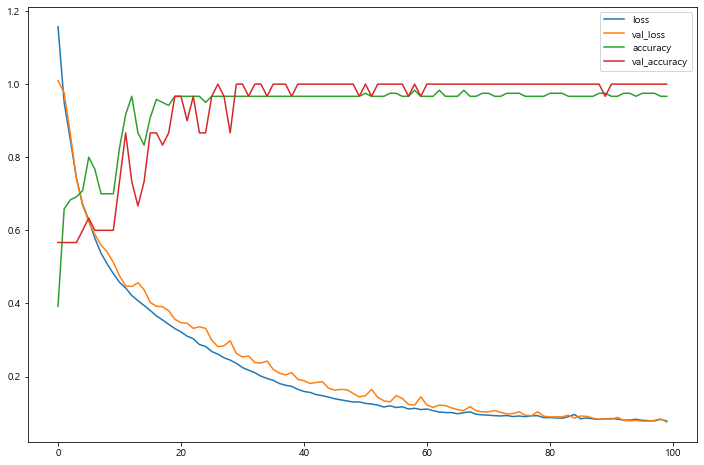

In [150]:
# 시각화
print(hist.history.keys())

plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"])

In [151]:
# 모델 평가
loss, acc = model.evaluate(X_test, y_test)
print(loss, acc)

30/30 [==============================] - 0s 33us/step
0.07546418160200119 1.0


In [156]:
from sklearn.metrics import classification_report, confusion_matrix

# 예측 테스트 
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix)



# 가상으로 입력
test_set = np.array([[5, 2.9, 1, 0.2]])
print("품종예측 : ", iris["species"].unique()[model.predict_classes(test_set)])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

<function confusion_matrix at 0x000001A3BAF6BA68>
품종예측 :  ['setosa']


    100% 다 맞춘것을 확인할 수 있다.

## DNN  (모듈화)


In [159]:
def make_model(input_num, output_num, hidden_layer) :
    model = Sequential()
    
    model.add(Dense(hidden_layer[0], input_shape=(input_num, ), activation="relu", name="hidden-1"))
    model.add(Dense(hidden_layer[1], activation="relu", name="hidden-2"))
    model.add(Dense(hidden_layer[2], activation="relu", name="hidden-3"))
    model.add(Dense(hidden_layer[3], activation="relu", name="hidden-4"))
    
    # 버리기
    model.add(keras.layers.core.Dropout(0.2)) # 20%만 버리고 나머지 실행 
    
    model.add(Dense(output_num, activation="softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
    
    return model

In [162]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#one_hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train = X_train.reshape(60000, 28*28).astype("float32") / 255
X_test = X_test.reshape(10000, 28*28).astype("float32") / 255


#파라미터 
input_num = 784
output_num = 10
hidden_layer = [255,255,255,255]

model = make_model(input_num, output_num, hidden_layer)  # 입력갯수, 출력갯수, [레이어갯수] 를 인자로 한다.
hist = model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2529 - accuracy: 0.9243
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0967 - accuracy: 0.9711
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0666 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.98 - 3s 50us/step - loss: 0.0481 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0393 - accuracy: 0.9874


    튜닝을 통해 성능을 더 올려야 한다. 97%면 되도 좀 좋은거 같은데 
    
    100, 30, 5  ->  255,255,255 로 수정하고 98%까지 올라갔다. 
    

## CNN 



In [163]:
# convolution layer를 사용해서 한다

from keras import layers

In [168]:
model = Sequential()

# conv layer : 필터갯수는 32개, 필터 크기는 3*3
# 입력 데이터 : 28*28*1 (흑백이라 1)

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))  # 여기는 input_shape가 들어가면 안되죠
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
#마지막은 max pooling을 해도되고 안해도 된다.


#FC 로 넘기기위한 중간과정
model.add(layers.Flatten())  #1차원으로 펼치기 위함
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="relu"))

model.summary()


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)             

In [169]:
# 방금전 코드를 가져왔다.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#one_hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train = X_train.reshape(60000, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype("float32") / 255


# #파라미터 
# input_num = 784
# output_num = 10
# hidden_layer = [255,255,255,255]

model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
hist = model.fit(X_train, y_train, epochs=5, batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 14s 229us/step - loss: nan - accuracy: 0.1064
Epoch 2/5
60000/60000 [==============================] - 13s 220us/step - loss: nan - accuracy: 0.0987
Epoch 3/5
60000/60000 [==============================] - 13s 221us/step - loss: nan - accuracy: 0.0987
Epoch 4/5
60000/60000 [==============================] - 13s 220us/step - loss: nan - accuracy: 0.0987
Epoch 5/5
60000/60000 [==============================] - 13s 221us/step - loss: nan - accuracy: 0.0987
